<a href="https://colab.research.google.com/github/Ammon1/Math/blob/master/noise_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
#from keras.layers import 
import tensorflow as tf
from keras import backend as K


import xgboost as xgb

In [3]:
def import_files(sample,ac_big,ac_small,number):#H67, 100AC,1AC,3
  i=0
  j=0
  for file in arr:
      if 'dpt' in file:
        #pomair dokladny
        if ac_big in file and sample in file:
            globals()['df_Y']=pd.read_csv(path+file,sep=',')
  for file in arr:
        #pomiar niedokladny
        if ac_small in file and sample in file:    
            print('i ',i)
            globals()['df'+str(i)]=pd.read_csv(path+file,sep=',')
            #intensity correction
            globals()['df'+str(i)]=globals()['df'+str(i)]*np.max(df_Y.iloc[:,1].values)/np.max((globals()['df'+str(i)].iloc[:,1].values))
            i=i+1
  Y_0=df_Y.iloc[:,1].values

  X_0=np.hstack((
              df0.iloc[:,1],
              df1.iloc[:,1],
              df2.iloc[:,1],
              df3.iloc[:,1],
              df4.iloc[:,1],
              ))
  globals()['Y'+number]=np.tile(Y_0,int(X_0.shape[0]/Y_0.shape[0]))
  globals()['X'+number]=np.vstack((X_0,X_1,X_2,X_3,X_4,X_5,X_8,X_9,X_10,X_11,X_12))
  

  

  plt.figure(figsize=(20,20))
  plt.plot(globals()['X'+number][0,:])
  plt.plot(globals()['Y'+number])
  return globals()['X'+number],globals()['Y'+number]

In [4]:
def create_dataset(X,Y, look_back):
	dataX, dataY = [], []
	for i in range(len(Y)-look_back-1):
		a = X[i:(i+look_back), :]
		dataX.append(a)
		dataY.append(Y[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [5]:
path='/content/drive/MyDrive/fizyka/ftir_noise/res12/'
arr = os.listdir(path)

In [6]:
i=0
j=0
for file in arr:
    if 'dpt' in file:
       #pomair dokladny
       if '500AC' in file and 'MIR' in file:
           print('big')
           globals()['df_Y']=pd.read_csv(path+file,sep=',')
       #pomiar niedokladny
       elif '1AC' in file and 'MIR' in file:    
           print('i ',i)
           globals()['df'+str(i)]=pd.read_csv(path+file,sep=',')
           i=i+1
      #pomiar tla
       elif '1AC' in file and 'bcg' in file:  
           print('bck j ',j)
           globals()['df_bg'+str(j)]=pd.read_csv(path+file,sep=',')
           j=j+1

big
i  0
i  1
i  2
i  3
i  4
bck j  0
bck j  1
bck j  2
bck j  3
bck j  4
bck j  5
bck j  6
bck j  7
bck j  8
bck j  9


In [7]:
Y_0=df_Y.iloc[:,1].values

X_0=np.hstack((
            df1.iloc[:,1],
            df2.iloc[:,1],
            df3.iloc[:,1],
            df4.iloc[:,1],
            df0.iloc[:,1],))

X_01=np.arange(0,df_Y.iloc[:,1].shape[0])
X_02=np.power(X_01,2)
X_03=np.power(X_01,3)

X0=df_bg0.iloc[:,1].values
X1=df_bg1.iloc[:,1].values
X2=df_bg2.iloc[:,1].values
X3=df_bg3.iloc[:,1].values
X4=df_bg4.iloc[:,1].values
X5=df_bg5.iloc[:,1].values
X6=df_bg6.iloc[:,1].values
X7=df_bg7.iloc[:,1].values
X8=df_bg8.iloc[:,1].values
X9=df_bg9.iloc[:,1].values


X_1=np.tile(X1,int(X_0.shape[0]/Y_0.shape[0]))
X_2=np.tile(X2,int(X_0.shape[0]/Y_0.shape[0]))
X_3=np.tile(X3,int(X_0.shape[0]/Y_0.shape[0]))
X_4=np.tile(X4,int(X_0.shape[0]/Y_0.shape[0]))
X_5=np.tile(X5,int(X_0.shape[0]/Y_0.shape[0]))
X_6=np.tile(X6,int(X_0.shape[0]/Y_0.shape[0]))
X_7=np.tile(X7,int(X_0.shape[0]/Y_0.shape[0]))
X_8=np.tile(X8,int(X_0.shape[0]/Y_0.shape[0]))
X_9=np.tile(X9,int(X_0.shape[0]/Y_0.shape[0]))

X_10=np.tile(X_01,int(X_0.shape[0]/Y_0.shape[0]))
X_11=np.tile(X_02,int(X_0.shape[0]/Y_0.shape[0]))
X_12=np.tile(X_03,int(X_0.shape[0]/Y_0.shape[0]))

Y=np.tile(Y_0,int(X_0.shape[0]/Y_0.shape[0]))
X=np.vstack((X_0,X_1,X_2,X_3,X_4,X_5,X_8,X_9,X_10,X_11,X_12))

i  0
i  1
i  2
i  3
i  4


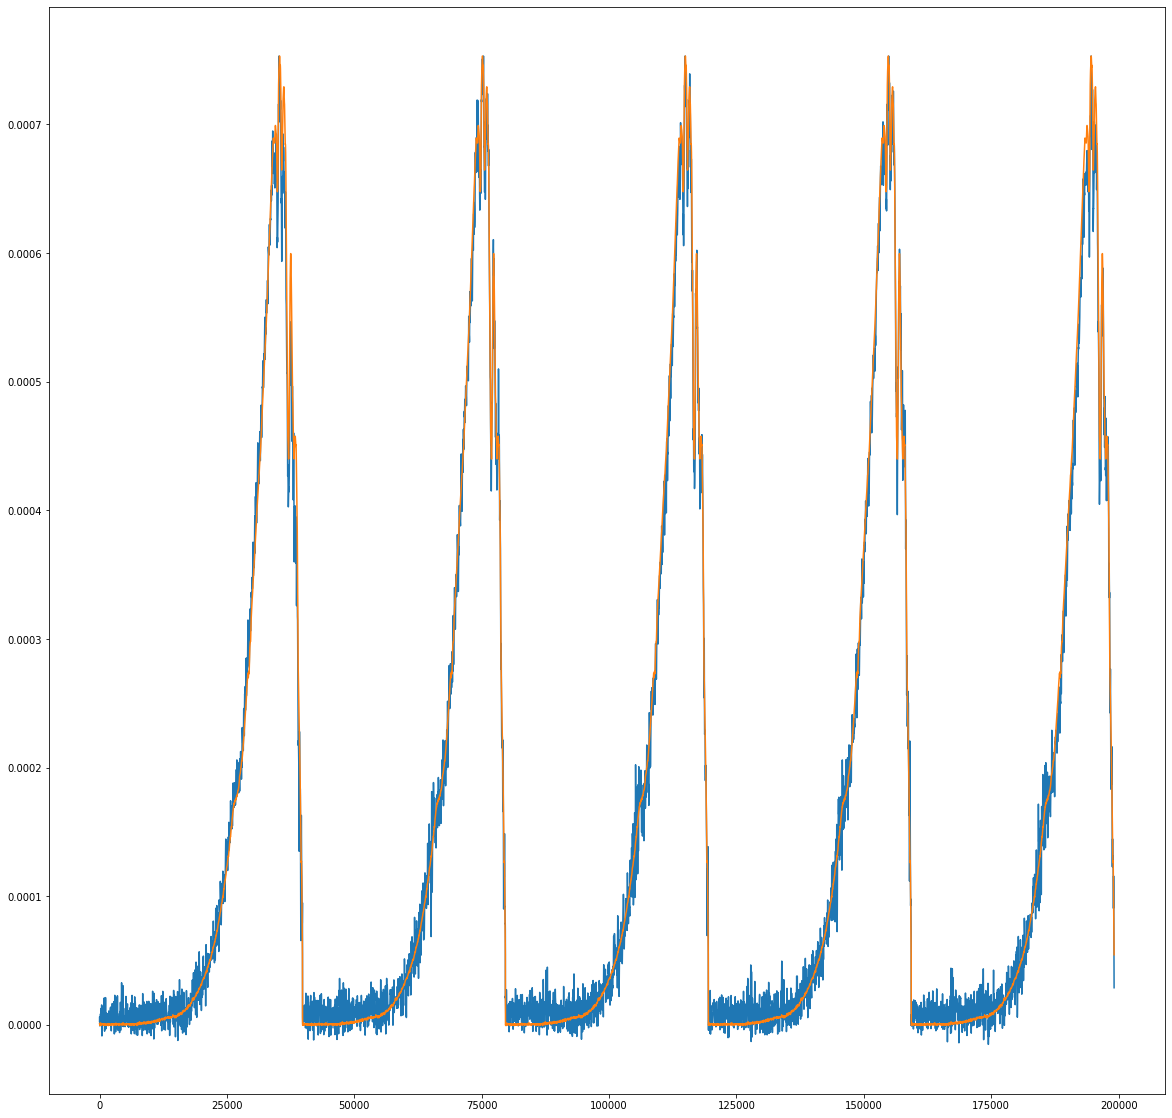

In [8]:
X1,Y1=import_files('1668','500AC','1AC','1')

i  0
i  1
i  2
i  3
i  4


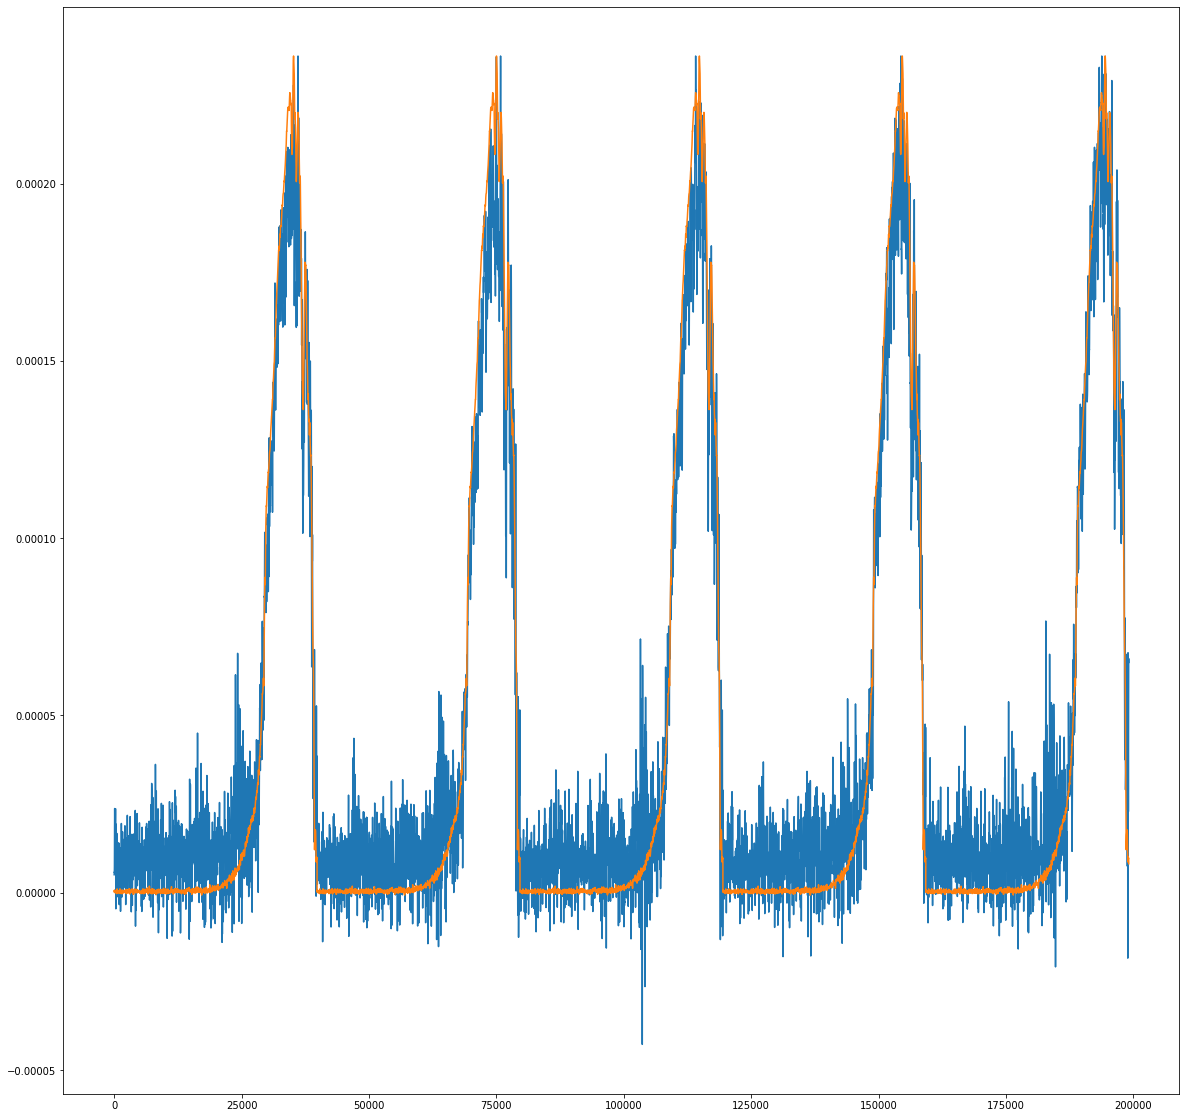

In [9]:
X2,Y2=import_files('testowa','500AC','1AC','2')

i  0
i  1
i  2
i  3
i  4
i  5


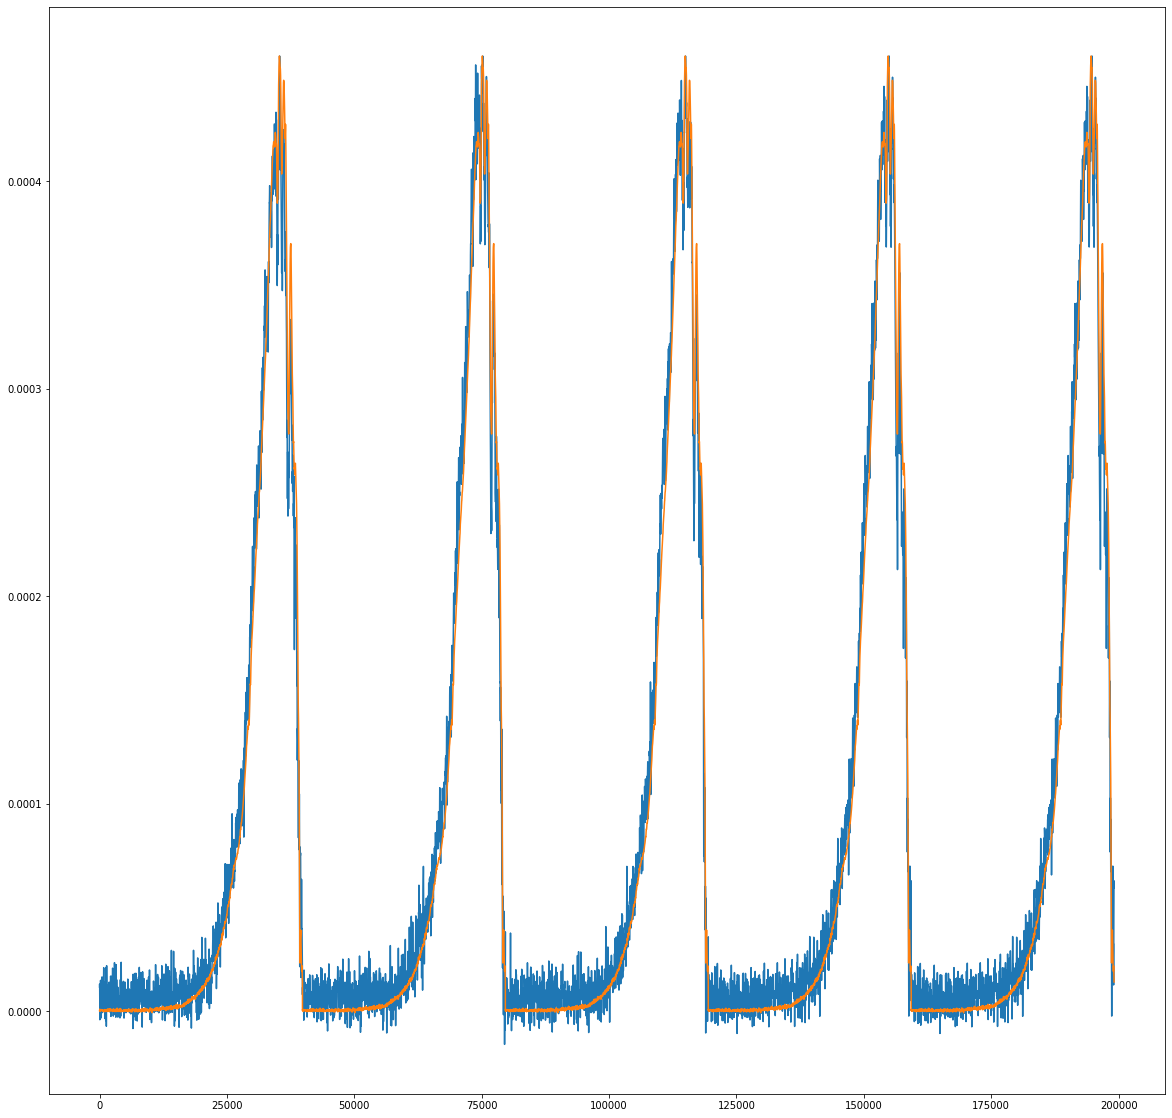

In [10]:
X3,Y3=import_files('10301','500AC','1AC','2')

i  0
i  1
i  2
i  3
i  4
i  5
i  6
i  7
i  8
i  9
i  10


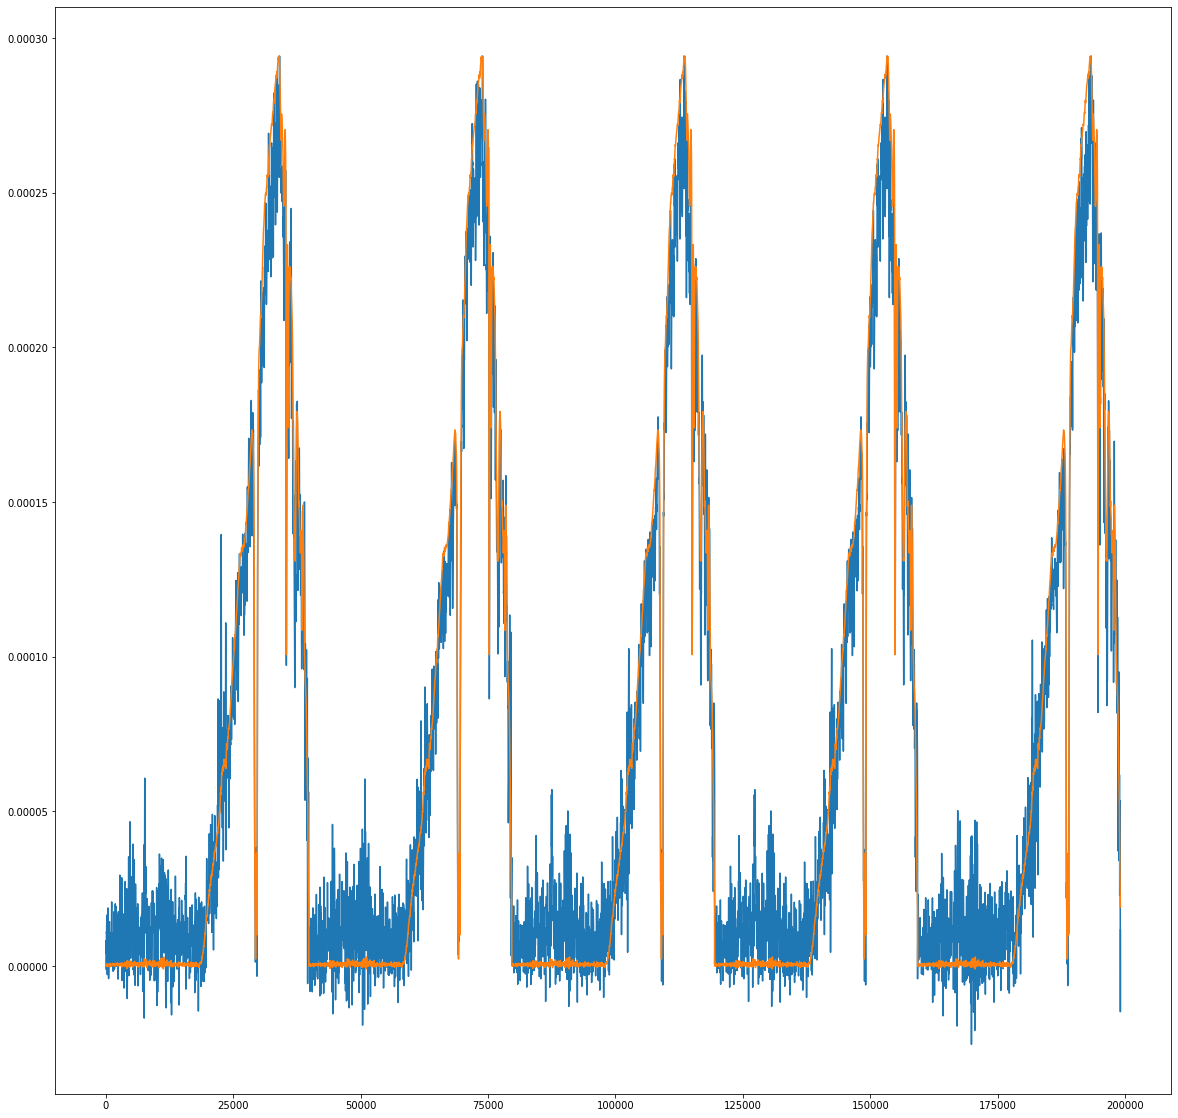

In [11]:
X4,Y4=import_files('pudelko','500AC','1AC','2')

In [12]:
print(X.shape)
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
print(Y.shape)

(11, 199105)
(11, 199105)
(11, 199105)
(11, 199105)
(11, 199105)
(199105,)


In [13]:
X=np.transpose(X)
X1=np.transpose(X1)
X2=np.transpose(X2)
X3=np.transpose(X3)
X4=np.transpose(X4)

In [14]:
X_fin=np.vstack((X,X1,X2,X3,X4))
Y_fin=np.hstack((Y,Y1,Y2,Y3,Y4))

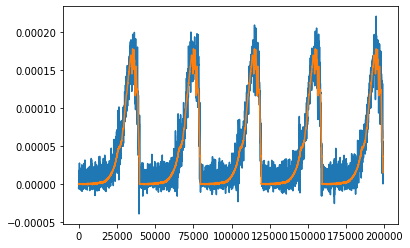

In [15]:
plt.plot(X[:,0])
plt.plot(Y)

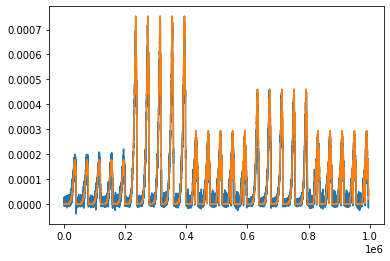

In [16]:
plt.plot(X_fin[:,0])
plt.plot(Y_fin)

In [17]:
scalerX = StandardScaler()
scalerY = StandardScaler()
X_fin=scalerX.fit_transform(X_fin)
Y_fin=Y_fin.reshape(-1,1)
Y_fin=scalerY.fit_transform(Y_fin)

In [18]:
print(X_fin.shape[0]/Y_0.shape[0])
print(Y_fin.shape)

25.0
(995525, 1)


In [31]:
X_fin=np.round(X_fin,decimals=6)
Y_fin=np.round(Y_fin,decimals=6)

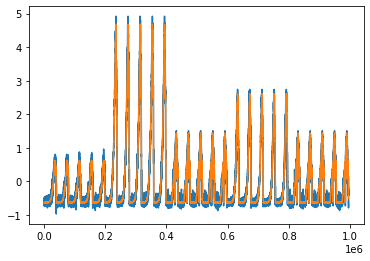

In [19]:
plt.plot(X_fin[:,0])
plt.plot(Y_fin)

In [20]:
X_train,y_train=X_fin[:24*Y_0.shape[0],:],Y_fin[:24*Y_0.shape[0]]
X_test,y_test=X_fin[24*Y_0.shape[0]:25*Y_0.shape[0],:],Y_fin[24*Y_0.shape[0]:25*Y_0.shape[0]]

In [21]:
look_back = 30
trainX, trainY = create_dataset(X_train,y_train, look_back)
testX, testY = create_dataset(X_test,y_test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 11, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 11, testX.shape[1]))

In [22]:
from keras.layers import Bidirectional

Epoch 1/200
956/956 - 12s - loss: 0.0237 - mse: 0.0237 - mae: 0.0855 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0539
Epoch 2/200
956/956 - 6s - loss: 0.0077 - mse: 0.0077 - mae: 0.0579 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0505
Epoch 3/200
956/956 - 6s - loss: 0.0060 - mse: 0.0060 - mae: 0.0505 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0447
Epoch 4/200
956/956 - 6s - loss: 0.0049 - mse: 0.0049 - mae: 0.0456 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0360
Epoch 5/200
956/956 - 6s - loss: 0.0043 - mse: 0.0043 - mae: 0.0421 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0324
Epoch 6/200
956/956 - 6s - loss: 0.0039 - mse: 0.0039 - mae: 0.0400 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0372
Epoch 7/200
956/956 - 6s - loss: 0.0036 - mse: 0.0036 - mae: 0.0383 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0330
Epoch 8/200
956/956 - 6s - loss: 0.0033 - mse: 0.0033 - mae: 0.0367 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0354
Epoch 9/200
956

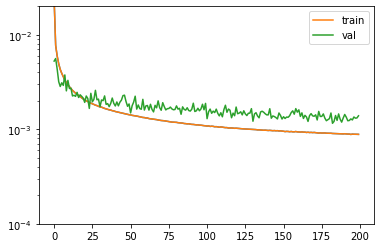

In [23]:
# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(32, input_shape=(11, look_back))))
model.add(Dense(64, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='RMSprop',metrics=['mse','mae'])
history=model.fit(trainX, trainY,validation_data=(testX, testY), epochs=200, batch_size=1000,verbose=3)

plt.plot(history.history['mse'])
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.ylim(0.0001,0.02)
plt.yscale('log')
plt.legend()
plt.show()
# make predictions

956/956 [==============================] - 8s 8ms/step - loss: 8.8036e-04 - mse: 8.8036e-04 - mae: 0.0180 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0193


(25000.0, 35000.0)

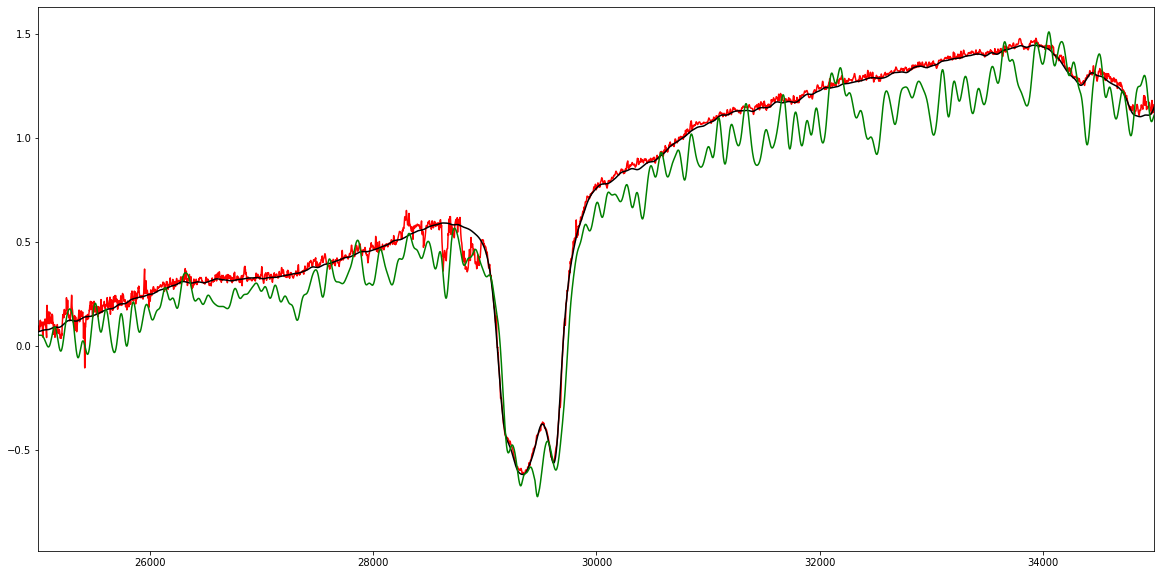

In [24]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1, batch_size=1000)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.figure(figsize=(20,10))
plt.plot(testPredict,color='red')
plt.plot(testY,color='black')
plt.plot(testX[:,0,0],color='green')
plt.xlim(25000,35000)

In [30]:
# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(11, look_back),kernel_initializer='he_uniform')))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(42, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(21, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='RMSprop',metrics=['mse','mae'])
history=model.fit(trainX, trainY,validation_data=(testX, testY), epochs=50, batch_size=1000,verbose=2)

plt.plot(history.history['mse'])
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.ylim(0.0001,0.02)

plt.legend()
plt.show()
# make predictions

Epoch 1/50


KeyboardInterrupt: ignored

Epoch 1/200
956/956 - 12s - loss: 0.0453 - mse: 0.0453 - mae: 0.1325 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0598
Epoch 2/200
956/956 - 7s - loss: 0.0242 - mse: 0.0242 - mae: 0.0995 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0655
Epoch 3/200
956/956 - 7s - loss: 0.0216 - mse: 0.0216 - mae: 0.0923 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0527
Epoch 4/200
956/956 - 7s - loss: 0.0198 - mse: 0.0198 - mae: 0.0878 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0522
Epoch 5/200
956/956 - 7s - loss: 0.0187 - mse: 0.0187 - mae: 0.0845 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0448
Epoch 6/200
956/956 - 7s - loss: 0.0179 - mse: 0.0179 - mae: 0.0822 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0467
Epoch 7/200
956/956 - 7s - loss: 0.0172 - mse: 0.0172 - mae: 0.0803 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0438
Epoch 8/200
956/956 - 7s - loss: 0.0169 - mse: 0.0169 - mae: 0.0792 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0441
Epoch 9/200
956

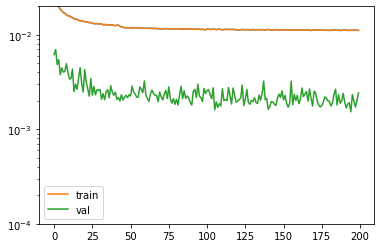

In [28]:
# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(11, look_back),kernel_initializer='he_uniform')))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(42, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(21, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='RMSprop',metrics=['mse','mae'])
history=model.fit(trainX, trainY,validation_data=(testX, testY), epochs=200, batch_size=1000,verbose=2)

plt.plot(history.history['mse'])
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.ylim(0.0001,0.02)
plt.yscale('log')
plt.legend()
plt.show()
# make predictions

956/956 [==============================] - 8s 8ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0644 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0331


(25000.0, 35000.0)

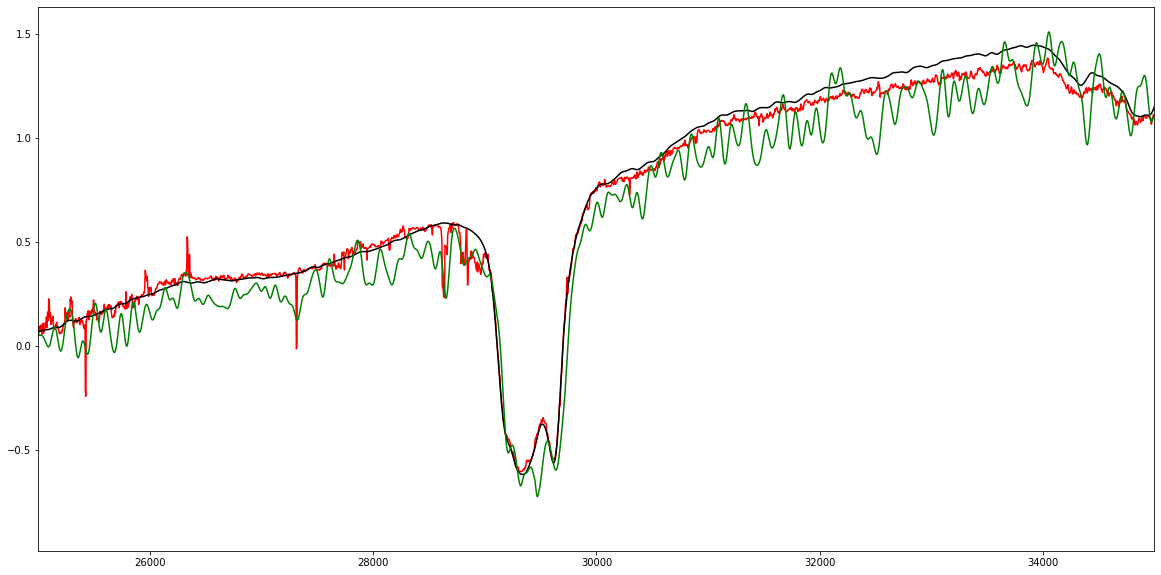

In [29]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1, batch_size=1000)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.figure(figsize=(20,10))
plt.plot(testPredict,color='red')
plt.plot(testY,color='black')
plt.plot(testX[:,0,0],color='green')
plt.xlim(25000,35000)

956/956 [==============================] - 7s 7ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0199 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0231


(25000.0, 35000.0)

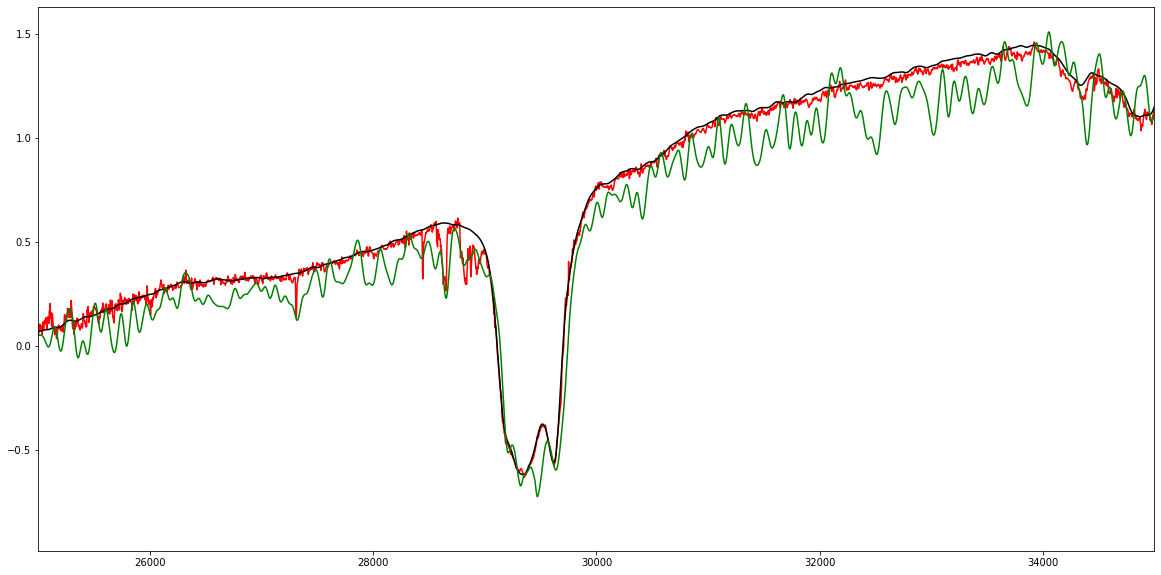

In [24]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1, batch_size=1000)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.figure(figsize=(20,10))
plt.plot(testPredict,color='red')
plt.plot(testY,color='black')
plt.plot(testX[:,0,0],color='green')
plt.xlim(25000,35000)

In [171]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1, batch_size=1000)

956/956 [==============================] - 5s 6ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0218 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0204


In [187]:
model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1, batch_size=1000)

956/956 [==============================] - 8s 8ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0206 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0198


In [188]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [189]:
testX.shape

(39800, 11, 20)

(25000.0, 35000.0)

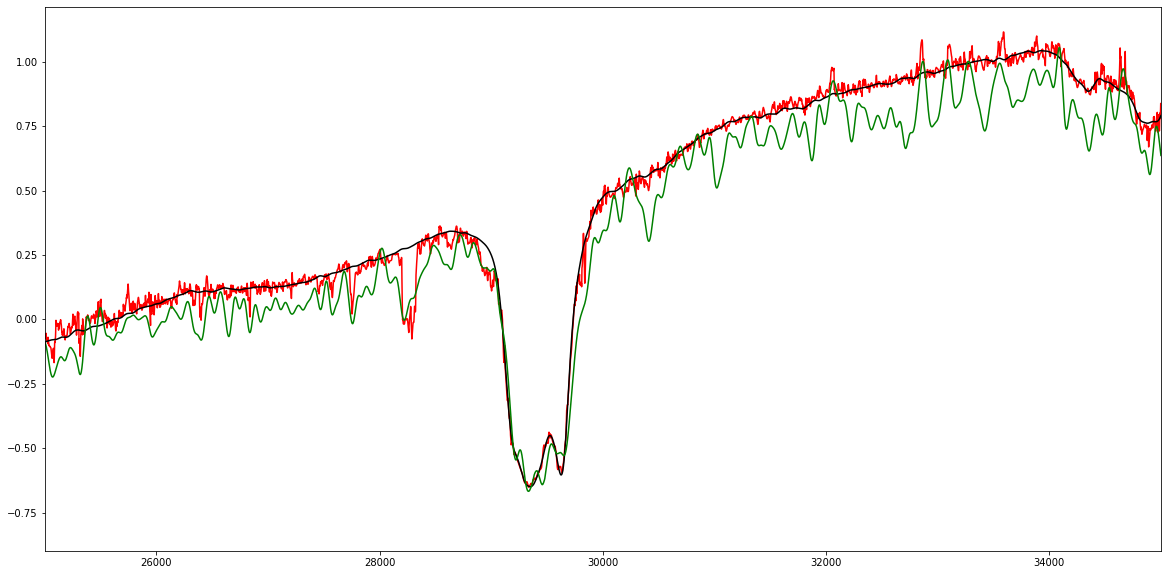

In [190]:
plt.figure(figsize=(20,10))
plt.plot(testPredict,color='red')
plt.plot(testY,color='black')
plt.plot(testX[:,0,0],color='green')
plt.xlim(25000,35000)

(25000.0, 35000.0)

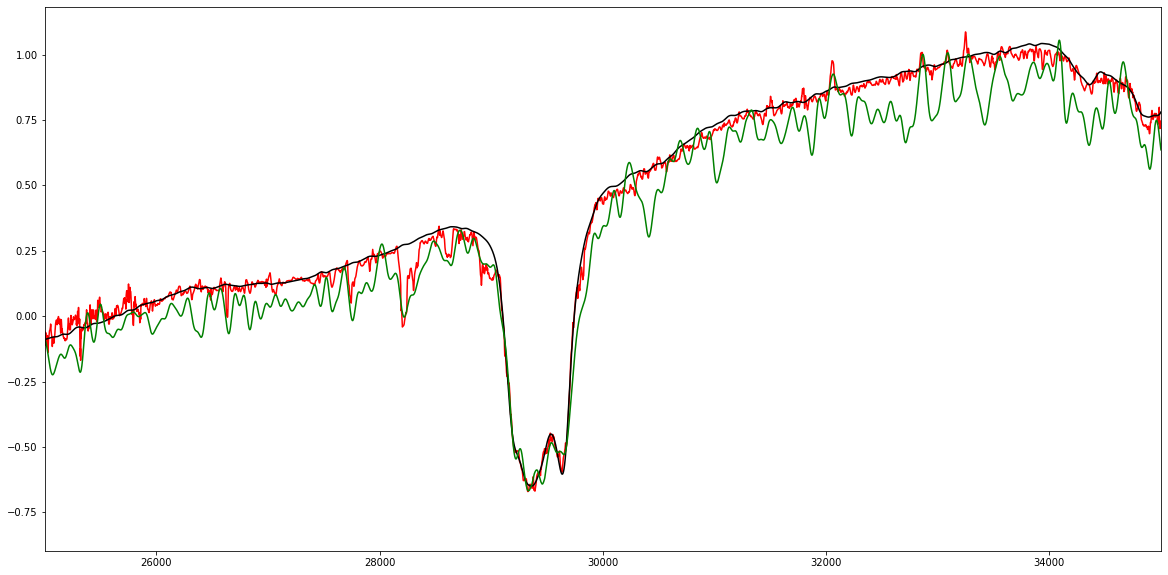

In [182]:
plt.figure(figsize=(20,10))
plt.plot(testPredict,color='red')
plt.plot(testY,color='black')
plt.plot(testX[:,0,0],color='green')
plt.xlim(25000,35000)

Epoch 1/300
956/956 - 4s - loss: 0.0351 - mse: 0.0351 - mae: 0.1005 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0538
Epoch 2/300
956/956 - 3s - loss: 0.0083 - mse: 0.0083 - mae: 0.0609 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0471
Epoch 3/300
956/956 - 3s - loss: 0.0073 - mse: 0.0073 - mae: 0.0563 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0439
Epoch 4/300
956/956 - 3s - loss: 0.0066 - mse: 0.0066 - mae: 0.0536 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0437
Epoch 5/300
956/956 - 3s - loss: 0.0061 - mse: 0.0061 - mae: 0.0514 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0411
Epoch 6/300
956/956 - 3s - loss: 0.0057 - mse: 0.0057 - mae: 0.0497 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0400
Epoch 7/300
956/956 - 3s - loss: 0.0054 - mse: 0.0054 - mae: 0.0483 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0397
Epoch 8/300
956/956 - 3s - loss: 0.0052 - mse: 0.0052 - mae: 0.0471 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0379
Epoch 9/300
956/

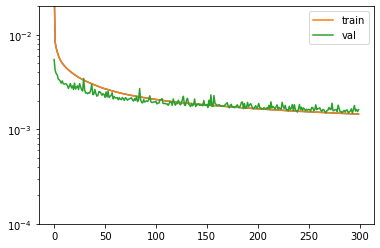

In [148]:
optimizer =tf.keras.optimizers.RMSprop(
    learning_rate=0.0001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=True,
    name='RMSprop',)
model = Sequential()
model.add(Dense(128, input_dim=11,activation='relu',kernel_initializer='he_uniform'))#dim
model.add(Dense(64, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=300, batch_size=1000,verbose=2)
plt.plot(history.history['mse'])
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.ylim(0.0001,0.02)
plt.yscale('log')
plt.legend()
plt.show()

In [149]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=1, batch_size=1000,verbose=2)

956/956 - 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0237 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0247


In [150]:
y_predict=model.predict(X_test)

(29000.0, 30000.0)

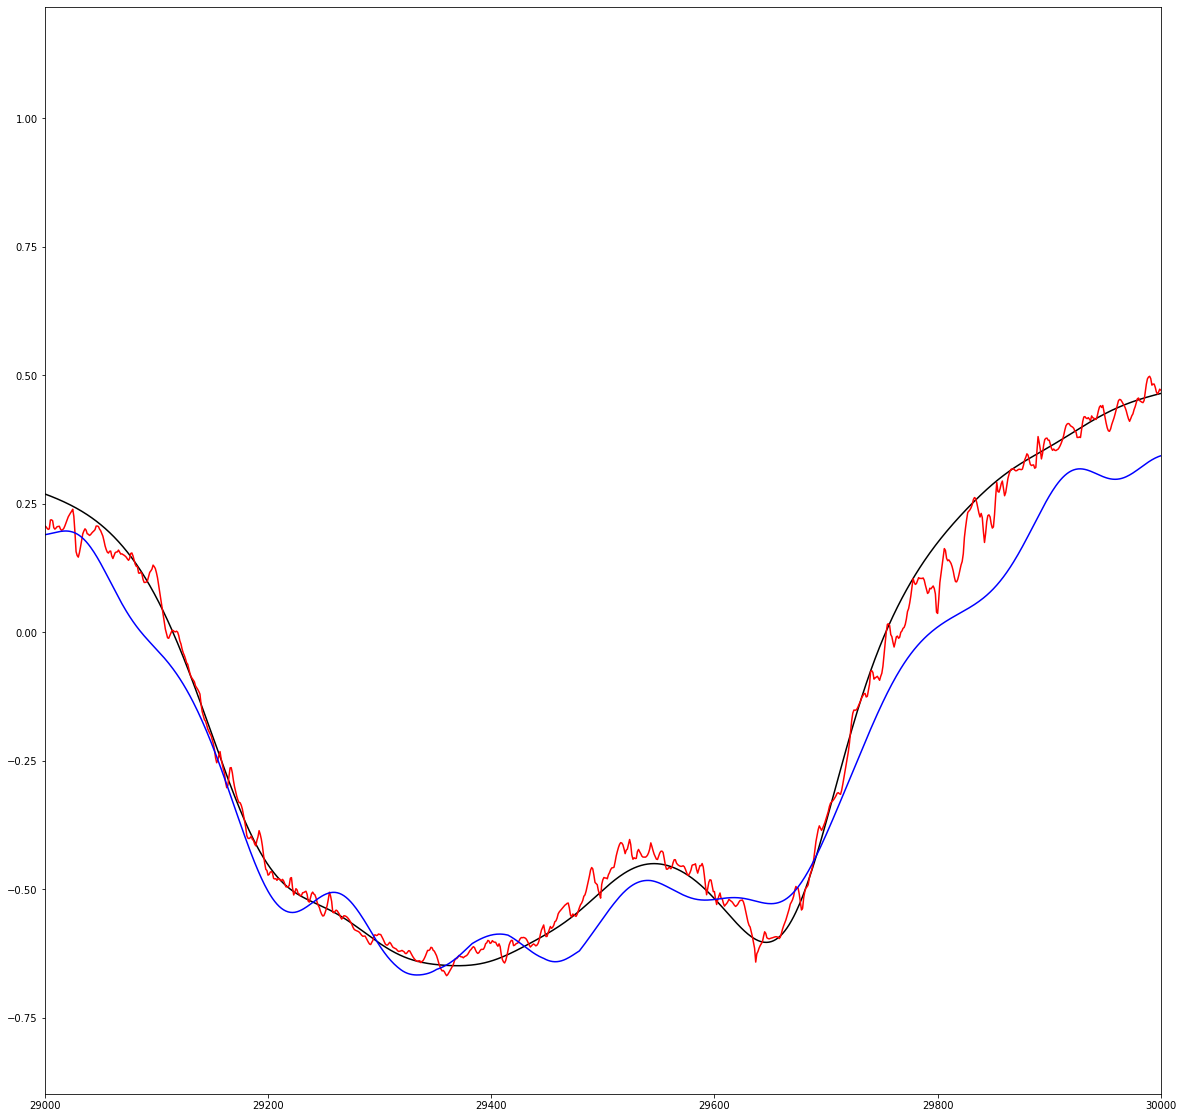

In [153]:
plt.figure(figsize=(20,20))
plt.plot(y_test,color='black')
plt.plot(y_predict,color='red')
plt.plot(X_test[:,0],color='blue')
plt.xlim(29000,30000)
#plt.ylim(-0.5,0)

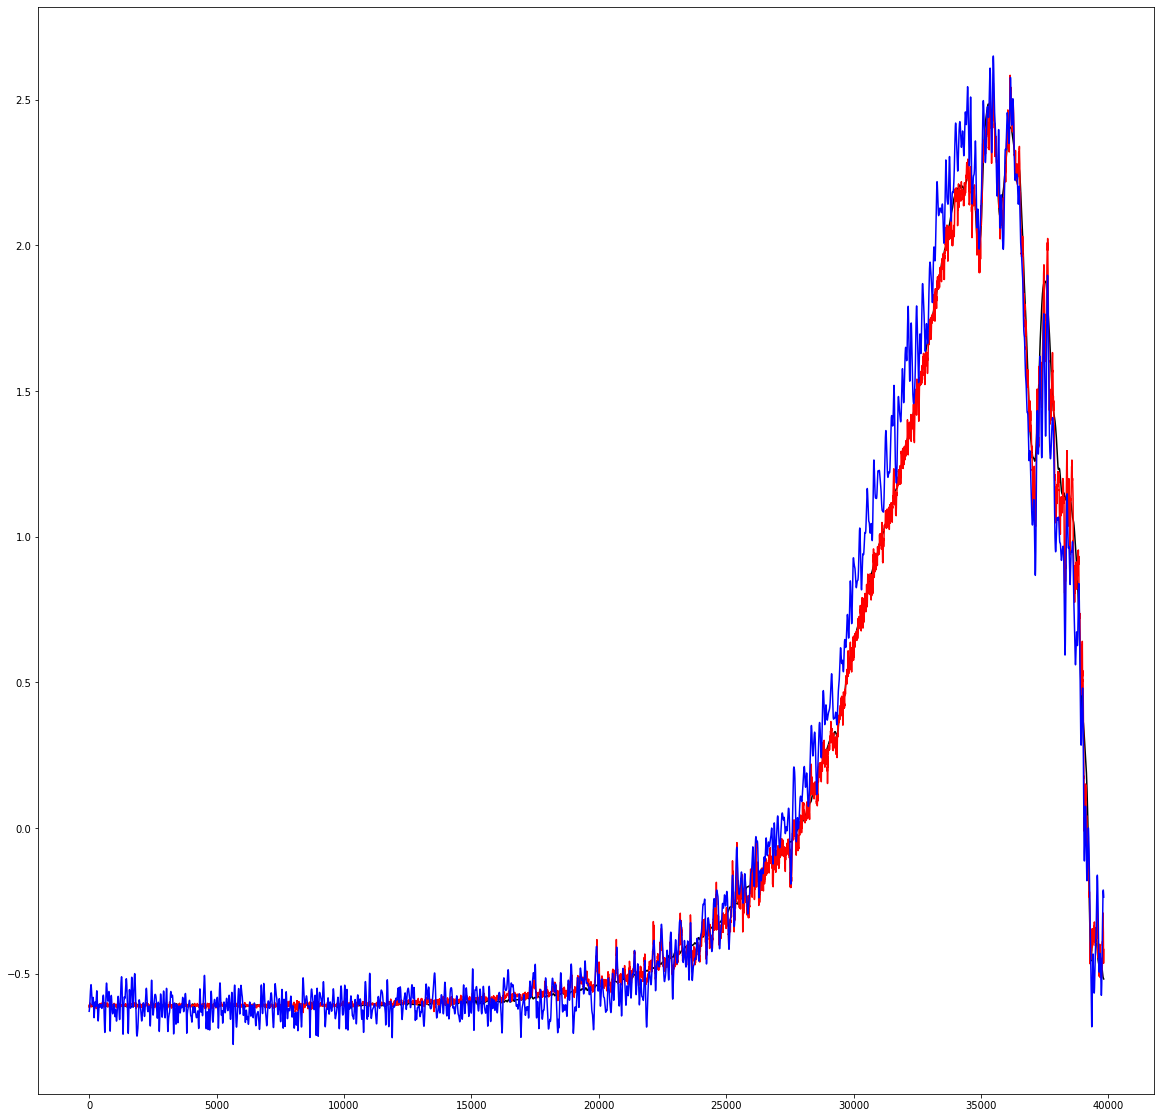

In [98]:
plt.figure(figsize=(20,20))
plt.plot(y_test,color='black')
plt.plot(y_predict,color='red')
plt.plot(X_test[:,0],color='blue')
#plt.ylim(-0.5,0)

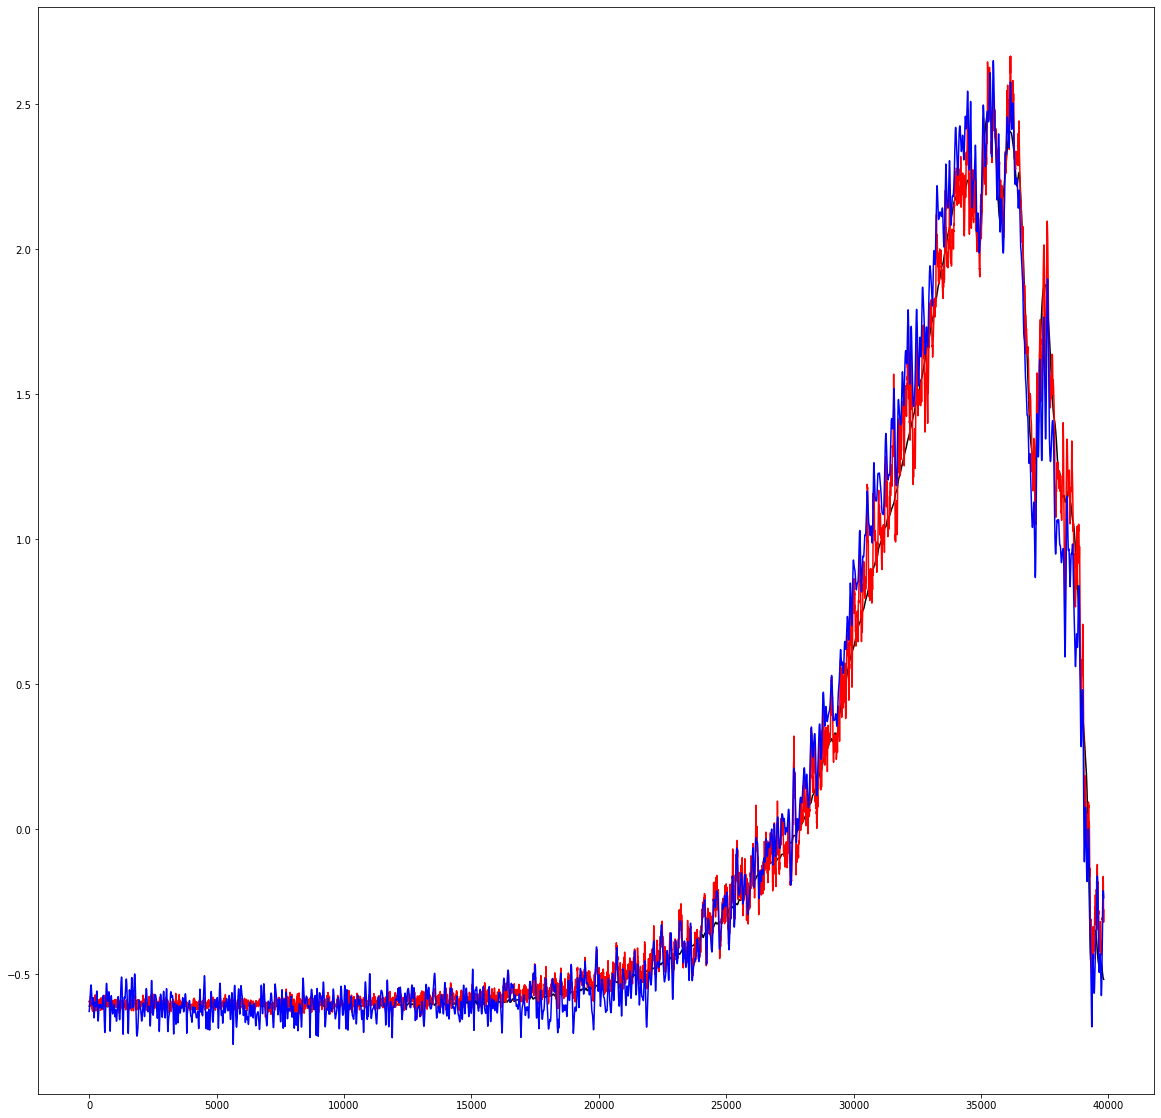

In [90]:
plt.figure(figsize=(20,20))
plt.plot(y_test,color='black')
plt.plot(y_predict,color='red')
plt.plot(X_test[:,0],color='blue')
#plt.ylim(-0.5,0)

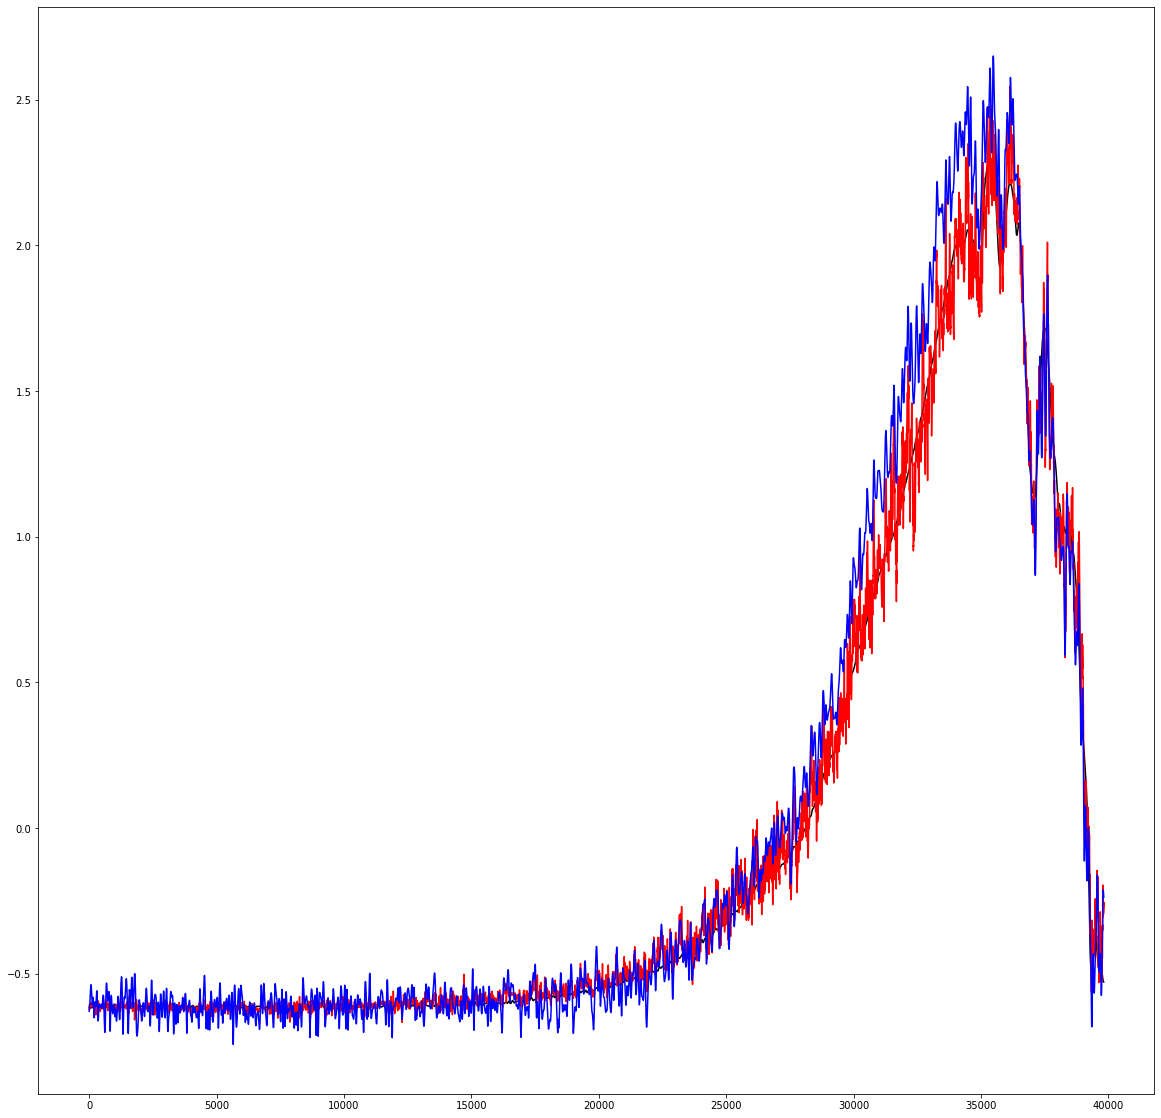

In [65]:
plt.figure(figsize=(20,20))
plt.plot(y_test,color='black')
plt.plot(y_predict,color='red')
plt.plot(X_test[:,0],color='blue')
#plt.ylim(-0.5,0)